In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
data=pd.read_csv(r"C:\Users\sath\Desktop\numpy notes\machine learning\FOLDER\K Mean clustering\other resource\kmeans_clustering-main\heart_dataset_mini.csv")

In [101]:
data

,age,sex,chol
0,63,1,233
1,37,1,250
2,41,0,204
3,56,1,236
4,57,0,354
...,...,...,...
298,57,0,241
299,45,1,264
300,68,1,193
301,57,1,131


In [102]:
data=data[['age','chol']]

In [103]:
data

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [104]:
data.isnull().sum()

age     0
chol    0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     303 non-null    int64
 1   chol    303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [106]:
data.describe()

,age,chol
count,303.000000,303.000000
mean,54.366337,246.264026
std,9.082101,51.830751
min,29.000000,126.000000
25%,47.500000,211.000000
50%,55.000000,240.000000
75%,61.000000,274.500000
max,77.000000,564.000000


Text(0, 0.5, 'age')

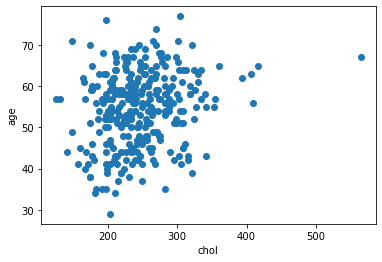

In [107]:
plt.scatter(data.chol,data.age)
plt.xlabel("chol")
plt.ylabel("age")

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1=sc.fit_transform(data)
data1

array([[ 9.52196602e-01, -2.56333707e-01],
       [-1.91531289e+00,  7.21994916e-02],
       [-1.47415758e+00, -8.16772694e-01],
       [ 1.80174816e-01, -1.98357261e-01],
       [ 2.90463642e-01,  2.08204965e+00],
       [ 2.90463642e-01, -1.04867848e+00],
       [ 1.80174816e-01,  9.22520713e-01],
       [-1.14329110e+00,  3.23430762e-01],
       [-2.60980491e-01, -9.13400106e-01],
       [ 2.90463642e-01, -1.51249006e+00],
       [-4.04028375e-02, -1.40380814e-01],
       [-7.02135797e-01,  5.55336549e-01],
       [-5.91846970e-01,  3.81407208e-01],
       [ 1.06248543e+00, -6.81494318e-01],
       [ 4.00752469e-01,  7.09940408e-01],
       [-4.81558144e-01, -5.26890460e-01],
       [ 4.00752469e-01,  1.81149290e+00],
       [ 1.28306308e+00, -3.91612084e-01],
       [-1.25357993e+00,  1.42230447e-02],
       [ 1.61392956e+00, -1.40380814e-01],
       [ 5.11041295e-01, -2.37008225e-01],
       [-1.14329110e+00, -2.56333707e-01],
       [-1.36386876e+00, -3.91612084e-01],
       [ 7.

In [88]:
from sklearn.cluster import KMeans

In [89]:
from sklearn.metrics import silhouette_score

In [90]:
model_label={}
cen={}
i_score=[]
sh_score=[]
for i in range(2,12):
    model=KMeans(n_clusters=i)
    model=model.fit(data1)
    
    label=model.labels_
    model_label[i]=label
    
    i_score.append(model.inertia_)
    
    sh_score.append(silhouette_score(data,label))
    
    cen[i]=model.cluster_centers_
    
    print("inertia :",model.inertia_,"silhouette :",(silhouette_score(data,label)))

inertia : 375.14224818605453 silhouette : 0.12442258916658146
inertia : 256.99429332036027 silhouette : 0.18809579109043248
inertia : 206.8799366359304 silhouette : 0.10871039780707954
inertia : 165.27183652713694 silhouette : 0.10848307605065224
inertia : 138.3244614208024 silhouette : 0.109270226429569
inertia : 118.79703651595112 silhouette : 0.1122176586077881
inertia : 105.6458765699499 silhouette : 0.08691515012101078
inertia : 92.91291394142107 silhouette : 0.10519719453262101
inertia : 81.95536987701243 silhouette : 0.0873246079091605
inertia : 74.6386105379932 silhouette : 0.06693451062464437


Text(0.5, 0, 'K')

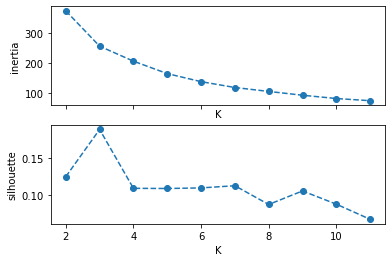

In [91]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.subplot(2,1,1)
plt.plot(range(2,12),i_score,"o--")
plt.ylabel("inertia")
plt.xlabel("K")

plt.subplot(2,1,2)
plt.plot(range(2,12),sh_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("K")

In [108]:
k_label=model_label[3]

In [109]:
k_cen=cen[3]

Text(0, 0.5, 'age')

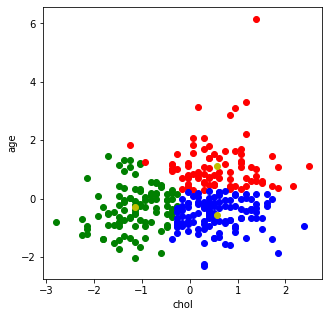

In [115]:
fig,ax=plt.subplots(figsize=(5,5))
#0 cluster
plt.scatter(data1[k_label == 0,0],data1[k_label == 0,1],c="green",label="cluster0")
#1 cluster
plt.scatter(data1[k_label==1,0],data1[k_label==1,1],c="red",label="cluster1")
# 2 cluster
plt.scatter(data1[k_label==2,0],data1[k_label==2,1],c="blue",label="cluster2")
#cluster
plt.scatter(k_cen[:,0],k_cen[:,1],c="y",label="center")
plt.xlabel("chol")
plt.ylabel("age")

In [111]:
data12=data
data12

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [114]:
data12['Labels']=k_label
data12

,age,chol,Labels
0,63,233,2
1,37,250,0
2,41,204,0
3,56,236,2
4,57,354,1
...,...,...,...
298,57,241,2
299,45,264,0
300,68,193,2
301,57,131,2
